In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn

In [0]:
df = pd.read_csv('Heart_Disease.csv')

## Feature Descriptives

In [0]:
def create_feature_confidence_table(df, columns):
    """Given the data & columns of consideration, add a row per column to the
    feature_confidence_table some standard matrix.

    Parameters
    ----------
    df : Pandas DataFrame object
        Dataframe containing `columns`.
    columns : list(str)
        Columns to plot found in `df`.
 
    Returns
    -------
    feature_confidence_table
        add more columns with standard matrix to this table.

    """
    # for time_window in time_windows:
    #     feature_df = df[df["time_window"]==time_window][columns]
    feature_df = df[columns]
    feature_confidence_table = pd.DataFrame(columns=['feature','count',\
            'null_count','null_percentage','non_null_count','non_null_percentage',\
            'distinct_count','distinct_percentage','max','min','mean','median',\
            'standard_deviation'])

    for i, column in enumerate(feature_df.columns):
        feature = f'{column}'
        data_type = feature_df[f'{column}'].dtype.name
        count = len(feature_df.index)
        non_null_count = feature_df[f'{column}'].count()
        non_null_pcg = '{:.2%}'.format(non_null_count/count)
        distinct_count = feature_df[f'{column}'].nunique()
        distinct_pcg = '{:.2%}'.format(distinct_count/count)
        null_count = feature_df[f'{column}'].isnull().sum()
        null_pcg = '{:.2%}'.format(null_count/count)
        max = feature_df[f'{column}'].max()
        min = feature_df[f'{column}'].min()
        mean = feature_df[f'{column}'].mean()
        median = feature_df[f'{column}'].median()
        standard_deviation = feature_df[f'{column}'].std()
        # time_window = time_window
        df_temp = pd.DataFrame([[feature,count,null_count,null_pcg,\
        non_null_count,non_null_pcg,distinct_count,distinct_pcg,max,min,\
        mean,median,standard_deviation]], \
        columns=['feature','count','null_count','null_percentage',\
            'non_null_count','non_null_percentage','distinct_count',\
            'distinct_percentage','max','min','mean','median','standard_deviation'])
        feature_confidence_table = feature_confidence_table.append(df_temp, ignore_index=True)

    return feature_confidence_table

In [0]:
cols = df.columns
create_feature_confidence_table(df, cols)

,feature,count,null_count,null_percentage,non_null_count,non_null_percentage,distinct_count,distinct_percentage,max,min,mean,median,standard_deviation
0,male,4240,0,0.00%,4240,100.00%,2,0.05%,1,0,0.429245,0.0,0.495027
1,age,4240,0,0.00%,4240,100.00%,39,0.92%,70,32,49.580189,49.0,8.572942
2,education,4240,105,2.48%,4135,97.52%,4,0.09%,4,1,1.979444,2.0,1.019791
3,currentSmoker,4240,0,0.00%,4240,100.00%,2,0.05%,1,0,0.494104,0.0,0.500024
4,cigsPerDay,4240,29,0.68%,4211,99.32%,33,0.78%,70,0,9.005937,0.0,11.922462
5,BPMeds,4240,53,1.25%,4187,98.75%,2,0.05%,1,0,0.029615,0.0,0.169544
6,prevalentStroke,4240,0,0.00%,4240,100.00%,2,0.05%,1,0,0.005896,0.0,0.076569
7,prevalentHyp,4240,0,0.00%,4240,100.00%,2,0.05%,1,0,0.310613,0.0,0.462799
8,diabetes,4240,0,0.00%,4240,100.00%,2,0.05%,1,0,0.025708,0.0,0.158280
9,totChol,4240,50,1.18%,4190,98.82%,248,5.85%,696,107,236.699523,234.0,44.591284


## Cross-tab Analysis of Nominal Features to Target

### Gender Chi-square test is significant

In [0]:
crosstab = pd.crosstab(df['male'], df['TenYearCHD'])
crosstab

TenYearCHD,0,1
male,,
0,2119,301
1,1477,343


In [0]:
stats.chi2_contingency(crosstab)

(32.61833491071198,
 1.1215175755662712e-08,
 1,
 array([[2052.43396226,  367.56603774],
        [1543.56603774,  276.43396226]]))

### Current Smoker Chi-square test is not significant, and thus will be removed for further analysis

In [0]:
crosstab = pd.crosstab(df['currentSmoker'], df['TenYearCHD'])
crosstab

TenYearCHD,0,1
currentSmoker,,
0,1834,311
1,1762,333


In [0]:
stats.chi2_contingency(crosstab)

(1.4972035438574873,
 0.2211021442164888,
 1,
 array([[1819.20283019,  325.79716981],
        [1776.79716981,  318.20283019]]))

### BPMeds Chi-square test is significant

In [0]:
crosstab = pd.crosstab(df['BPMeds'], df['TenYearCHD'])
crosstab

TenYearCHD,0,1
BPMeds,,
0.0,3471,592
1.0,83,41


In [0]:
stats.chi2_contingency(crosstab)

(30.6459909156739,
 3.0966578525207775e-08,
 1,
 array([[3448.74659661,  614.25340339],
        [ 105.25340339,   18.74659661]]))

### Prevalent Stroke Chi-square test is significant

In [0]:
crosstab = pd.crosstab(df['prevalentStroke'], df['TenYearCHD'])
crosstab

TenYearCHD,0,1
prevalentStroke,,
0,3582,633
1,14,11


In [0]:
stats.chi2_contingency(crosstab)

(14.033657261599943,
 0.0001795675785918809,
 1,
 array([[3574.79716981,  640.20283019],
        [  21.20283019,    3.79716981]]))

### Prevalent Hyp Chi-square test is significant

In [0]:
crosstab = pd.crosstab(df['prevalentHyp'], df['TenYearCHD'])
crosstab

TenYearCHD,0,1
prevalentHyp,,
0,2604,319
1,992,325


In [0]:
stats.chi2_contingency(crosstab)

(132.45628623925992,
 1.1889609489706164e-30,
 1,
 array([[2479.03490566,  443.96509434],
        [1116.96509434,  200.03490566]]))

### Diabetes Chi-square test is significant

In [0]:
crosstab = pd.crosstab(df['diabetes'], df['TenYearCHD'])
crosstab

TenYearCHD,0,1
diabetes,,
0,3527,604
1,69,40


In [0]:
stats.chi2_contingency(crosstab)

(38.48233814115802,
 5.525144036275509e-10,
 1,
 array([[3503.55566038,  627.44433962],
        [  92.44433962,   16.55566038]]))

### Education Chi-square test is significant

In [0]:
crosstab = pd.crosstab(df['education'], df['TenYearCHD'])
crosstab

TenYearCHD,0,1
education,,
1.0,1397,323
2.0,1106,147
3.0,601,88
4.0,403,70


In [0]:
stats.chi2_contingency(crosstab)

(32.0170399303682,
 5.190369142973463e-07,
 3,
 array([[1458.77629988,  261.22370012],
        [1062.70157195,  190.29842805],
        [ 584.35864571,  104.64135429],
        [ 401.16348247,   71.83651753]]))

## Box Plots of Continuous Features to Target

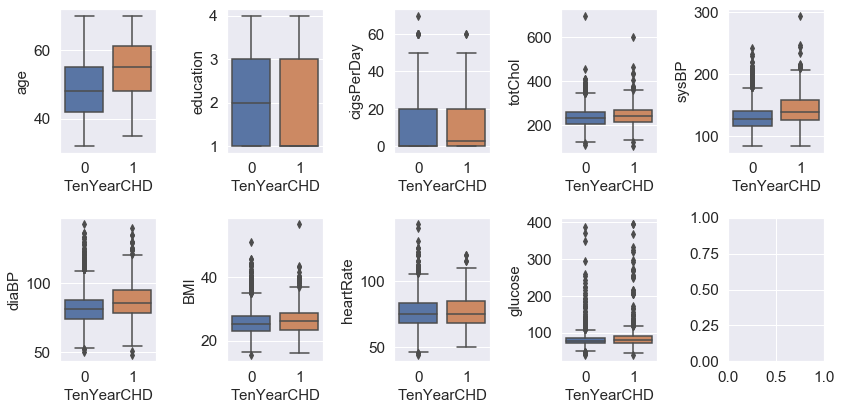

In [0]:
continuous_cols = ['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(12, 6)
sns.set(font_scale=1.4)

for i, el in enumerate(continuous_cols):
    a = sns.boxplot(x='TenYearCHD', y=f"{el}", data=df, ax=axes.flatten()[i])
    a.set_xlabel("TenYearCHD",fontsize=15)
    a.set_ylabel(f"{el}",fontsize=15)

plt.tight_layout() 
plt.show()

### Age t-test is significant

In [0]:
print(stats.ttest_ind(df['age'], df['TenYearCHD']))

Ttest_indResult(statistic=375.1011263670365, pvalue=0.0)


### Education t-test is significant

In [0]:
stats.ttest_ind(df['education'], df['TenYearCHD'], nan_policy='omit')

Ttest_indResult(statistic=109.91912073213608, pvalue=0.0)

### CigsPerDay t-test is significant

In [0]:
stats.ttest_ind(df['cigsPerDay'], df['TenYearCHD'], nan_policy='omit')

Ttest_indResult(statistic=48.334923874733505, pvalue=0.0)

### TotChol t-test is significant

In [0]:
stats.ttest_ind(df['totChol'], df['TenYearCHD'], nan_policy='omit')

Ttest_indResult(statistic=345.41216778888224, pvalue=0.0)

### SysBP t-test is significant

In [0]:
stats.ttest_ind(df['sysBP'], df['TenYearCHD'])

Ttest_indResult(statistic=390.64847033662136, pvalue=0.0)

### DiaBP t-test is significant

In [0]:
stats.ttest_ind(df['diaBP'], df['TenYearCHD'])

Ttest_indResult(statistic=452.1744092295788, pvalue=0.0)

### BMI t-test is significant

In [0]:
stats.ttest_ind(df['BMI'], df['TenYearCHD'],nan_policy='omit')

Ttest_indResult(statistic=407.78094537394514, pvalue=0.0)

### HeartRate t-test is significant

In [0]:
stats.ttest_ind(df['heartRate'], df['TenYearCHD'],nan_policy='omit')

Ttest_indResult(statistic=409.86717120822084, pvalue=0.0)

### Glucose t-test is significant

In [0]:
stats.ttest_ind(df['glucose'], df['TenYearCHD'],nan_policy='omit')

Ttest_indResult(statistic=222.36356652335732, pvalue=0.0)

## Correlation Analysis of Features to Target

In [0]:
sns.set(font_scale=2)
def plt_corr(df, columns):
    corr=df[columns].corr(method='spearman')
    plt.figure(figsize = (45,25))
    sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        linewidths=.5)
    plt.show()
    return corr

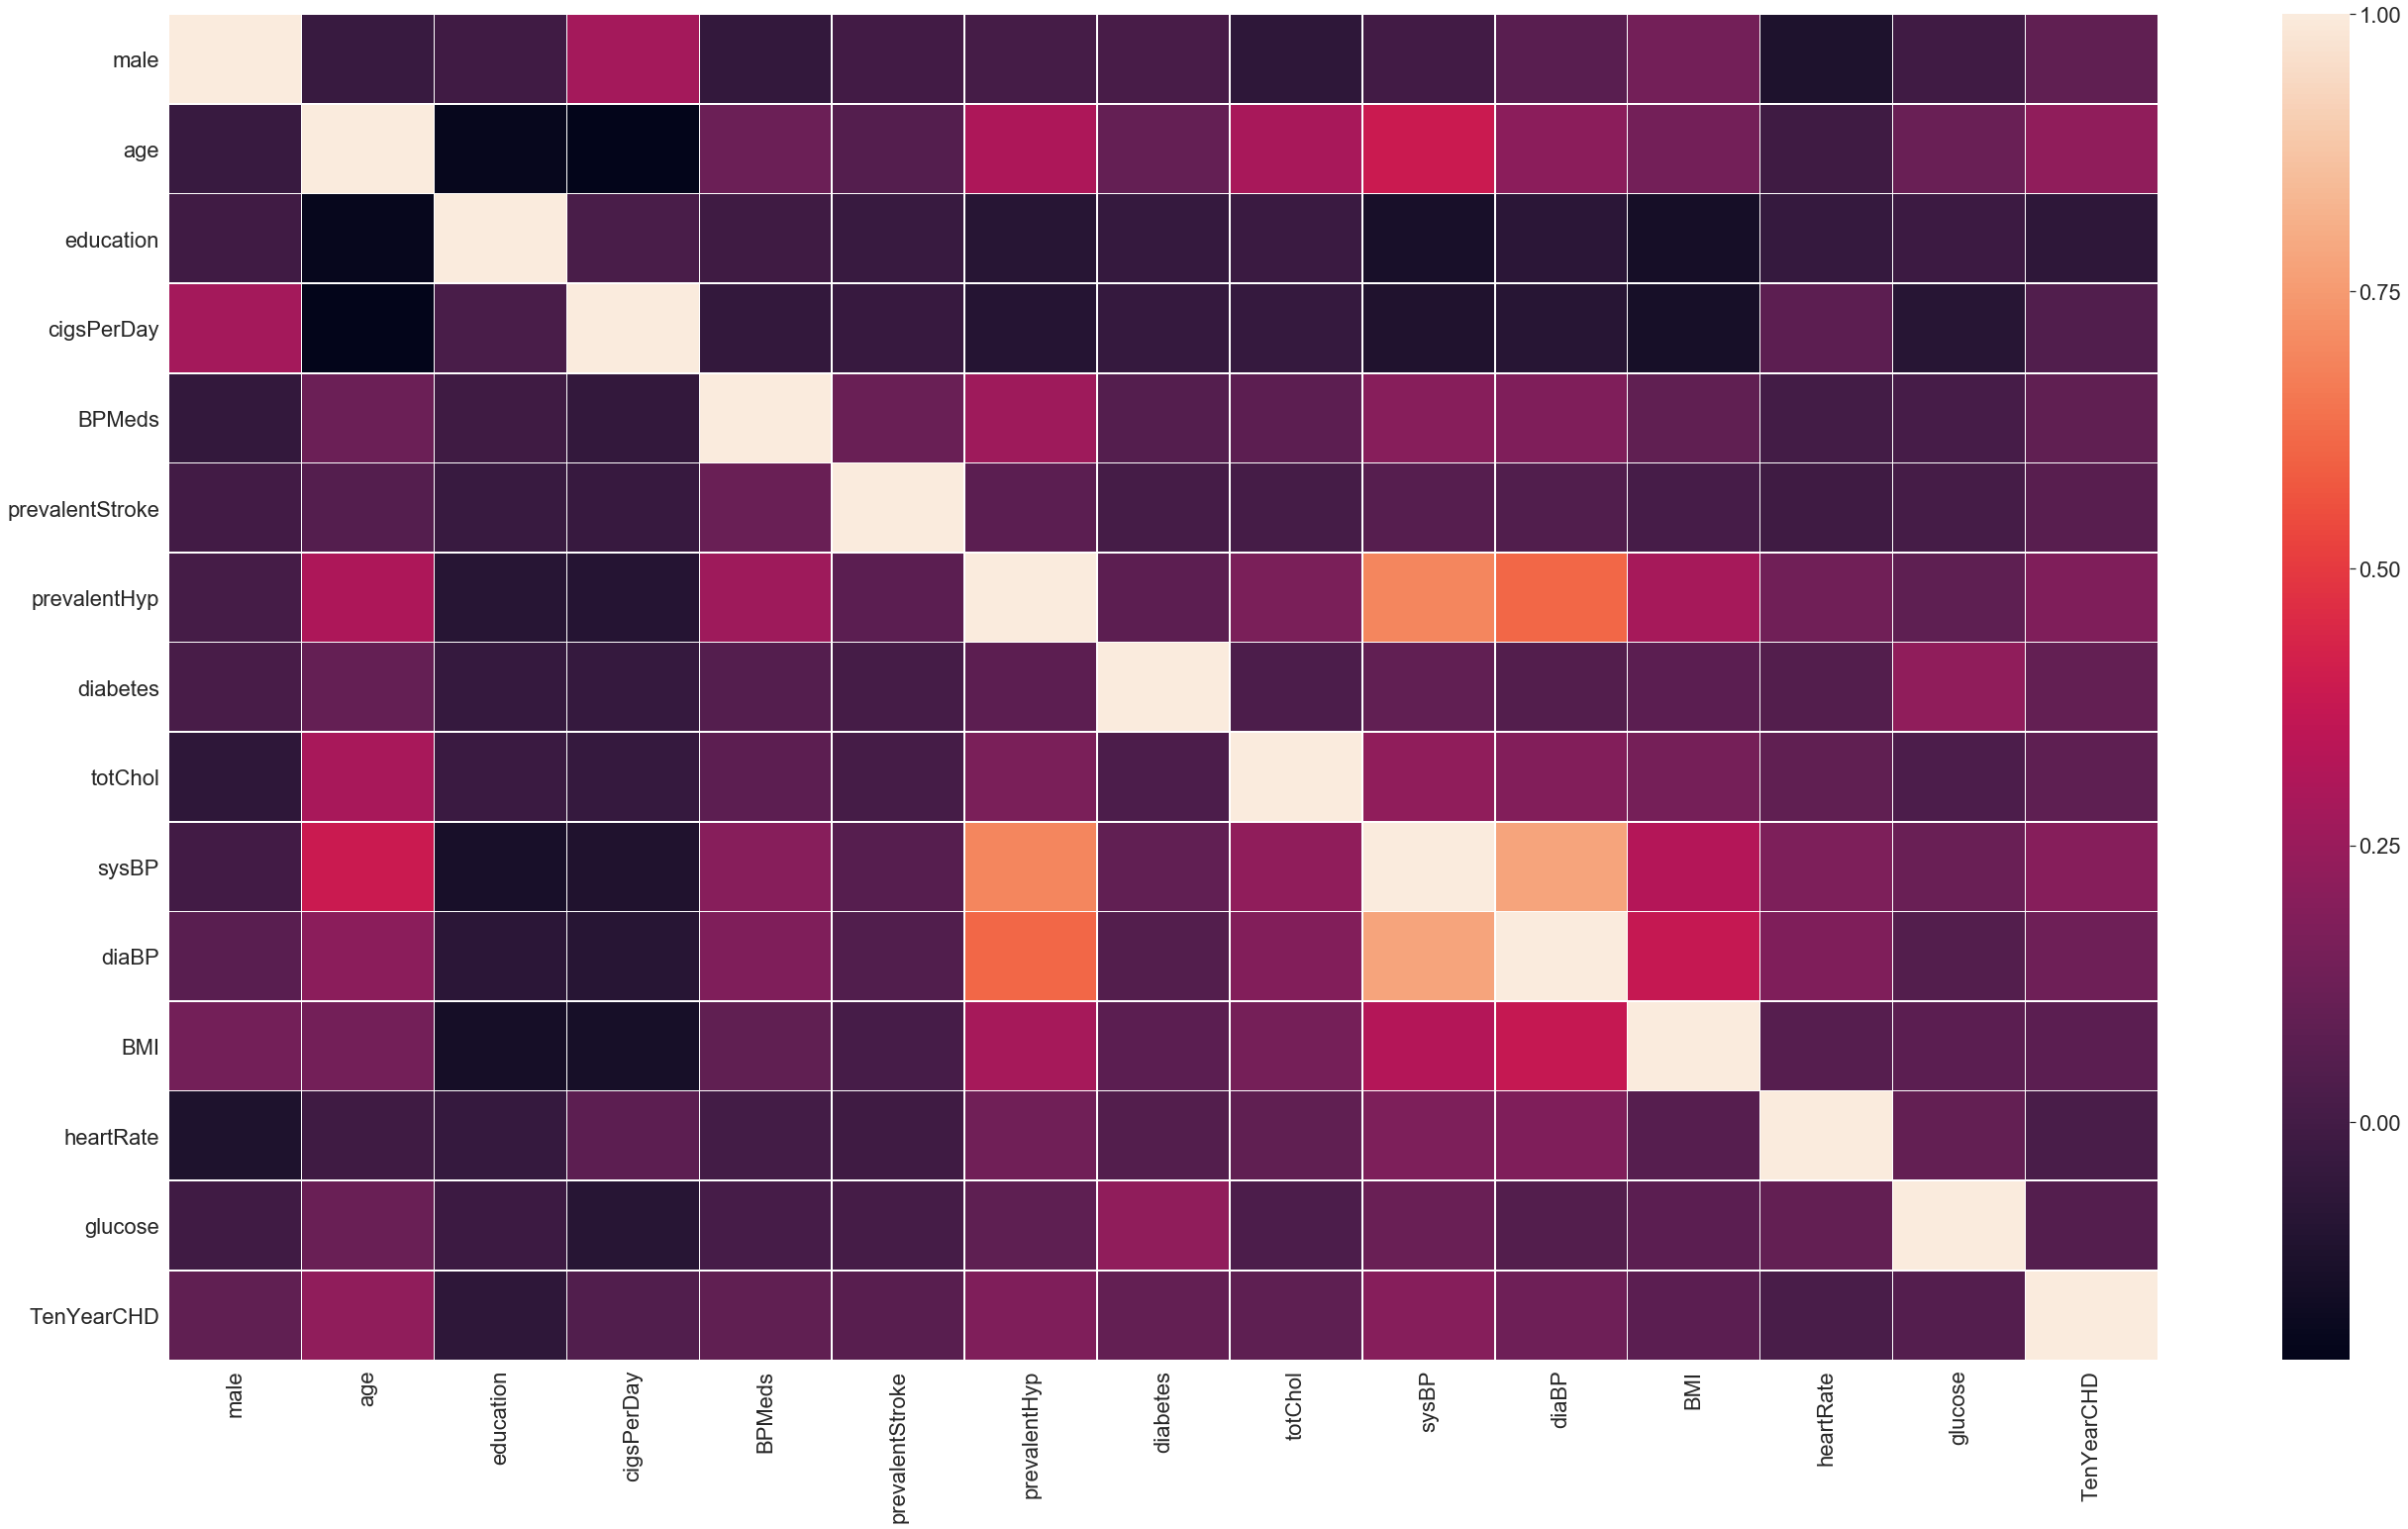

In [0]:
df = df.drop('currentSmoker',axis=1)
corr= plt_corr(df, df.columns)

In [0]:
corr

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029644,-0.006579,0.280281,-0.052504,-0.004550,0.005853,0.015693,-0.065540,-0.005511,0.067355,0.141316,-0.115221,-0.009512,0.088374
age,-0.029644,1.000000,-0.191417,-0.214606,0.119042,0.055086,0.305293,0.100855,0.289178,0.390978,0.207965,0.145394,-0.014679,0.116189,0.222953
education,-0.006579,-0.191417,1.000000,0.019408,-0.011023,-0.034300,-0.088657,-0.043457,-0.028880,-0.136036,-0.072962,-0.147580,-0.039668,-0.024483,-0.066172
cigsPerDay,0.280281,-0.214606,0.019408,1.000000,-0.049941,-0.035392,-0.092063,-0.040917,-0.040758,-0.111193,-0.089064,-0.140515,0.078982,-0.089991,0.043478
BPMeds,-0.052504,0.119042,-0.011023,-0.049941,1.000000,0.117370,0.261067,0.052060,0.077563,0.202157,0.177707,0.088177,0.000541,0.011620,0.087519
prevalentStroke,-0.004550,0.055086,-0.034300,-0.035392,0.117370,1.000000,0.074791,0.006955,0.007141,0.059288,0.046252,0.008603,-0.013615,0.005576,0.061823
prevalentHyp,0.005853,0.305293,-0.088657,-0.092063,0.261067,0.074791,1.000000,0.077752,0.162100,0.694539,0.614711,0.285250,0.136292,0.083468,0.177458
diabetes,0.015693,0.100855,-0.043457,-0.040917,0.052060,0.006955,0.077752,1.000000,0.029289,0.090454,0.046784,0.071238,0.048968,0.225278,0.097344
totChol,-0.065540,0.289178,-0.028880,-0.040758,0.077563,0.007141,0.162100,0.029289,1.000000,0.223548,0.185083,0.147928,0.088633,0.029890,0.080001
sysBP,-0.005511,0.390978,-0.136036,-0.111193,0.202157,0.059288,0.694539,0.090454,0.223548,1.000000,0.777615,0.324086,0.171263,0.116567,0.194375


## Backward Elimination Feature Selection

### Deal with Missing Values

In [0]:
df[['education','cigsPerDay']] = df[['education','cigsPerDay']].fillna(value=0)

In [0]:
imputer = SimpleImputer(strategy="median")
imputer.fit(df)
df_imputed = imputer.transform(df)
df = pd.DataFrame(df_imputed, columns = df.columns)

### Backward Elimination

In [0]:
df ['constant'] = 1
X = df.drop('TenYearCHD', axis=1)
cols = X.columns
y = df['TenYearCHD']
logit = sm.Logit(y, X)
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.378439
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4225
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Apr 2020   Pseudo R-squ.:                  0.1116
Time:                        23:57:54   Log-Likelihood:                -1604.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 2.899e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.5029      0.100      5.010      0.000       0.306       0.700
age                 0.0622      0.006     10.029      0.000       0.050       0.074
education          -0.0094      0.044     -0.213      0.832      -0.096       0.077
cigsPerDay          0.0218      0.004      5.583      0.000       0.014       0.029
BPMeds              0.2434      0.220      1.105      0.269      -0.188       0.675
prevalentStroke     0.9627      0.441      2.181      0.029       0.097       1.828
prevalentHyp        0.2302      0.128      1.792      0.073      -0.022       0.482
diabetes            0.1876      0.294      0.638      0.524      -0.389       0.764
totChol             0.0018      0.001      1.782      0.075      -0.000       0.004
sysBP               0.0141      0.004      3.994      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.486      0.627      -0.015       0.009
BMI                 0.0031      0.012      0.266      0.790      -0.020       0.026
heartRate          -0.0015      0.004     -0.376      0.707      -0.009       0.006
glucose             0.0067      0.002      3.134      0.002       0.003       0.011
constant           -8.1254      0.657    -12.364      0.000      -9.413      -6.837
===================================================================================
"""

In [0]:
def back_feature_elem (df, target, cols):
    while len(cols)>0 :
        model=sm.Logit(target,df[cols])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            cols=cols.drop(largest_pvalue.index)

result=back_feature_elem(df, df['TenYearCHD'] ,cols)

In [0]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
conf

,CI 95%(2.5%),CI 95%(97.5%),Odds Ratio,pvalue
male,1.339436,1.960696,1.620564,0.000
age,1.054621,1.079399,1.066938,0.000
cigsPerDay,1.014207,1.029606,1.021877,0.000
prevalentStroke,1.208851,6.684146,2.842559,0.017
sysBP,1.013223,1.021203,1.017205,0.000
glucose,1.004410,1.010843,1.007622,0.000
constant,0.000098,0.000452,0.000211,0.000


In [0]:
X = df[['male','age','cigsPerDay','prevalentStroke','sysBP','glucose','constant']]
y = df['TenYearCHD']
logit = sm.Logit(y, X)
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.379498
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Thu, 02 Apr 2020   Pseudo R-squ.:                  0.1091
Time:                        00:01:13   Log-Likelihood:                -1609.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 5.270e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4828      0.097      4.966      0.000       0.292       0.673
age                 0.0648      0.006     10.937      0.000       0.053       0.076
cigsPerDay          0.0216      0.004      5.630      0.000       0.014       0.029
prevalentStroke     1.0447      0.436      2.395      0.017       0.190       1.900
sysBP               0.0171      0.002      8.524      0.000       0.013       0.021
glucose             0.0076      0.002      4.662      0.000       0.004       0.011
constant           -8.4642      0.389    -21.747      0.000      -9.227      -7.701
===================================================================================
"""

## Logistic Regression

In [0]:
df_after_selection=df[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
print(len(df[df['TenYearCHD']==1])/len(df['TenYearCHD']))
# Split data into train test splits
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=46, stratify=y)

0.15188679245283018


In [0]:
logit = LogisticRegression(
        penalty="none",
        solver="lbfgs",
        random_state=704,
        class_weight="balanced"
        )
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

/Users/yiranliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
def plot_confusion_matrix(y_true, y_pred):
    """Plot confusion matrix."""
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Plot heatmap of confusion matrix
    sns.heatmap(
        conf_matrix,
        vmin=0,
        annot=True,
        fmt="d",
        xticklabels=["Predicted Healthy", "Predicted Heart Disease"],
        yticklabels=["Actual Healthy", "Actual Heart Disease"],
    )

    plt.title("population size = {}".format(len(y_pred)))
    plt.tight_layout()
    plt.show()

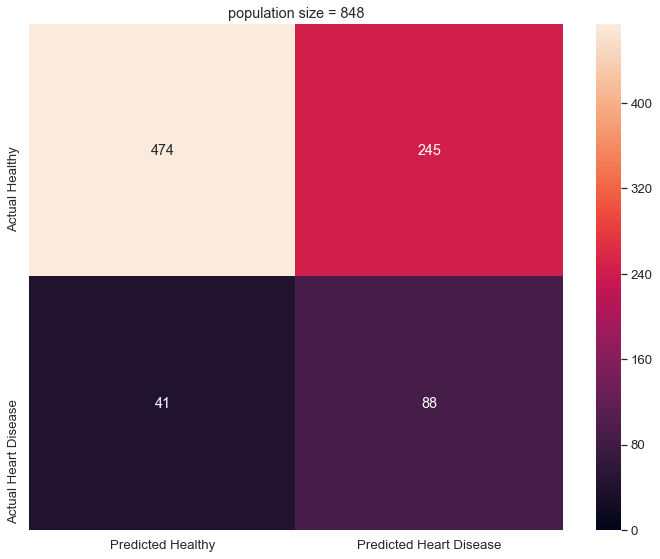

In [0]:
sns.set(font_scale=1.2)
plt.figure(figsize = (10,8))
plot_confusion_matrix(y_test, y_pred)

In [0]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.6627358490566038

In [0]:
sklearn.metrics.f1_score(y_test,y_pred)

0.380952380952381